# Regresión I: ¿Donde estan los ojos?

Muchos de los sistemas de reconocimiento de personas por medio de imagenes utilizan la ubicación de puntos importantes en la cara, con el objetivo de identificar la ubicación del rostro. Algunos puntos importantes son los ojos, la nariz y la boca, a partir de ellos es posible definir las coordenadas entre las cuales se encuentra ubicada la cara de la persona. El profesor Alexander siempre ha tenido una gran fascinadción por estos sistemas, y dado que sus estudiantes ya saben como trabajar con redes neuronales, él ha decidido que ellos realicen un sistemas de identificación de la ubicación de los ojos a partir de imagenes.

Para la realización de este proyecto el estudiante debera:

1. Crear una base de datos con fotografias donde diferentes personas, y en cada una de estas se debe generar un elemento que identifique la ubicación de los ojos. Aqui debe tener en cuenta dos cosas:
    * Tenga en cuenta que una red aprende con base en la información que le proporcionemos, asi que al crear la base de datos tenga en cuenta todas las posibilidades que se imaginen de como podrian estar esas fotos.
    * Si tenemos imagenes muy grandes esto requerira de una red muy grande que puede tardar mucho tiempo en entrenar. Tenga en cuenta esto por si es necesario procesar las imagenes antes de ingresarlas a la red.   
2. Definir las arquitecturas de red que debe probar.
3. Escoger la red que mejor se desempeñe.
4. Evaluar el rendimiento de la red.


Tenga en cuenta que todo el procedimiento debe ser lo mas amigable para probar. Es decir si el profesor Alexander quiere probar una foto, entonces él solo deberia ingresar la foto en una función la cual se encargue de hacer todo el procesamiento y proporcionar como salida si la persona tiene o no tapabocas.

Además el profesor quiere que contesten las siguientes preguntas:

1. ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?
2. ¿Qué criterio utilizo para seleccionar la arquitectura de la red?
3. ¿Tiene la red el comportamiento esperado?, sino, ¿A qué cree que se debe esto?
4. ¿Qué le mejoraria al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

## Qué se debe entregar:

Par ala entrega del proyecto deben porporcionar:

1. La base de datos generada.
2. Un notebook de Jupyter donde presentan todo el pipeline para el entrenamiento de la red. Cada parte debe ser explicada.
3. El notebook debe incluir una función que permita ingresar una muestra de entrada y se proporcione la salida, sin mas pasos intermedios. Por lo tanto en esta función se debe tener en cuenta el acondicionamiento de los datos, antes de ser introducidos en la red neuronal par arealizar las predicciones.
4. El notebook debe incluir las respuestas a las preguntas planteadas.

In [9]:
import numpy as np           # Esta libreria se utiliza para realizar operaciones matemáticas y para manejar arreglos
from xml.dom import minidom  # Esta libreria se utiliza para leer archivos xml
from imutils import paths    # Esta libreria se utiliza para ni mondada porque no funciona con xml
import glob                  # Esta libreria se importa para guardar todo el conjunto de archivos xml
import cv2                   # Esta libreria 
import matplotlib.pyplot as plt
import matplotlib.image as img # Esta libreria sirve para transformar las imagines en grises FALLO 2
from skimage import io       # Esta libreria sirve para transformar las imagines en grises FALLO 1
from PIL import Image        # Esta libreria sirve para transformar las imagines en grises FALLO 3
import matplotlib.patches as patches

Vamos a normalizar tanto los datos de entrada que son las imagenes como los datos de salida (y) que son las posiciones de los ojos y luego se va a modificar el tamaño de las imagenes con resample image.

In [41]:
'''
De esta forma se leen los archivos xml  de esta dirección
doc = minidom.parse('C:/Users/HOGAR (JOSE)/Desktop/U/2021-2/Aprendizaje automático de Maquinas/Tareas/Proyecto II final/Donde estan los ojos/train/real_00001.xml')

De esta forma se leen los archivos de una manera más simple
doc = minidom.parse('train_labels/real_00001.xml')
'''

# Guarda todos los archivos xml en una lista
xml_list = []
for filename in glob.glob('train_labels/*.xml'): 
    im = minidom.parse(filename)
    xml_list.append(im)

# Se crea una lista con los valores de las y esperada
y = []
for xml in xml_list:
    y_1 = []
    xmin = xml.getElementsByTagName("xmin")[0]
    y_1.append(int(xmin.firstChild.data)/600)    # Se normalizan los datos dividiendolos por el máximo (600)
    ymin = xml.getElementsByTagName("ymin")[0]
    y_1.append(int(ymin.firstChild.data)/600)
    xmax = xml.getElementsByTagName("xmax")[0]
    y_1.append(int(xmax.firstChild.data)/600)
    ymax = xml.getElementsByTagName("ymax")[0]
    y_1.append(int(ymax.firstChild.data)/600)
    y.append(y_1)
    
# Se transforma la lista en array
y = np.array(y)
print('Dimensiones de y:',y)

Dimensiones de y: [[0.37166667 0.41833333 0.865      0.56833333]
 [0.265      0.44333333 0.735      0.59      ]
 [0.20166667 0.32666667 0.53833333 0.535     ]
 [0.3        0.38666667 0.75333333 0.61333333]
 [0.16333333 0.39666667 0.63333333 0.59666667]
 [0.19166667 0.28       0.83166667 0.49      ]
 [0.505      0.31833333 0.86333333 0.50666667]
 [0.395      0.41333333 0.79166667 0.575     ]
 [0.50666667 0.15833333 0.88833333 0.40333333]
 [0.17       0.275      0.66666667 0.52166667]
 [0.26       0.35666667 0.76166667 0.54833333]
 [0.26666667 0.44833333 0.8        0.62166667]
 [0.25166667 0.38833333 0.74833333 0.585     ]
 [0.255      0.355      0.74833333 0.51      ]
 [0.205      0.35833333 0.78666667 0.51      ]
 [0.195      0.34666667 0.78       0.58833333]
 [0.20166667 0.36166667 0.81666667 0.59      ]
 [0.23666667 0.36       0.62666667 0.56666667]
 [0.22833333 0.465      0.70666667 0.655     ]
 [0.29666667 0.435      0.76       0.60833333]
 [0.28666667 0.35166667 0.78333333 0.57166

Dimensiones de y: (70, 4)
Ahora se leeran las imagenes de entrenamiento y se transformaran a escala de grises.


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [196 195 195 ... 188 187 187]
 [197 196 195 ... 188 186 187]
 [195 195 195 ... 189 189 190]]


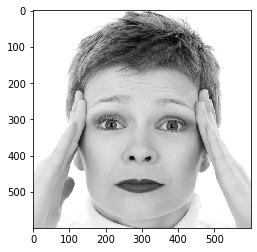

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.76862746 0.7647059  0.7647059  ... 0.7372549  0.73333335 0.73333335]
 [0.77254903 0.76862746 0.7647059  ... 0.7372549  0.7294118  0.73333335]
 [0.7647059  0.7647059  0.7647059  ... 0.7411765  0.7411765  0.74509805]]
shape twooo  (600, 600)


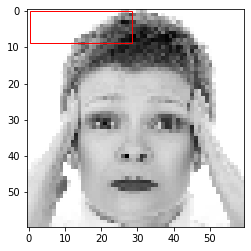

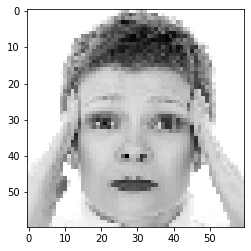

shape treess [[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.81960785 0.7764706  0.76274514 ... 0.76274514 0.7833333  0.8029412 ]
 [0.79509807 0.76274514 0.754902   ... 0.75       0.75490195 0.7705883 ]
 [0.76862746 0.7588235  0.76274514 ... 0.74215686 0.7343137  0.74509805]]


In [42]:
#Obtener el path de cada imágen en el dataset
im_paths = list(paths.list_images('train/')) 

image=Image.open(im_paths[1])   # abrimoslaimagen a travez del path 
gray_image=image.convert('L')    # loconvertimosa escala de grises 
gray_image_array=np.asarray(gray_image)   # imagen a tipo array
print(gray_image_array)
plt.imshow(gray_image_array,cmap='gray')   # mostramos la imagen en gris 
plt.show()
gray_image_array = gray_image_array.astype('float32')/255  # normalizamos 
print(gray_image_array)                                    # mostramos la matriz normalizada 
#plt.imshow(gray_image_array,cmap='gray', vmin = 0, vmax = 255)   


print('shape twooo ',gray_image_array.shape)               # shape de ma latriz normalizada 
#print(gray_image_array)

newImg = cv2.resize(gray_image_array, (0,0), fx=0.1, fy=0.1)    # cambiamos el tamaño de la imagen 

fig,ax = plt.subplots(1)
ax.imshow(newImg,cmap='gray')                                  # mostramos la nueva imagen con su nuevo tamaño 
#plt.imshow(newImg,cmap='gray')
rect = patches.Rectangle((159/600,266/6000),28.2,8.8,linewidth=1,edgecolor='r',facecolor='none')  # rectangulo de las coordenadas 
ax.add_patch(rect)
plt.show()

plt.imshow(newImg,cmap='gray')
plt.show()
print('shape treess', newImg)

